In [1]:
import os
import copy
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from UnsupervisedRF import read_data_samples, UnsupervisedRandomForest

In [2]:
X_train = read_data_samples()

In [3]:
params = { 'X': X_train,
              'n_features': X_train.shape[1],
              'max_depth': 100,
              'min_samples_split': 3,
              'max_features': 'log2',
              'bootstrap': False,
              'n_samples': X_train.shape[0],
              'n_estimators': 50,
              'random_state': 0
            }

In [4]:
URF = UnsupervisedRandomForest(**params)

In [5]:
X, y = URF.generate_data()

In [6]:
URF.fit(X,y)

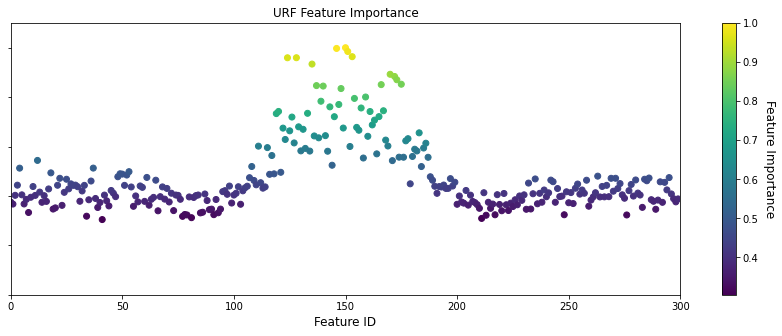

In [7]:
features = URF.get_feature_importance(plot=True)

(3873, 50)


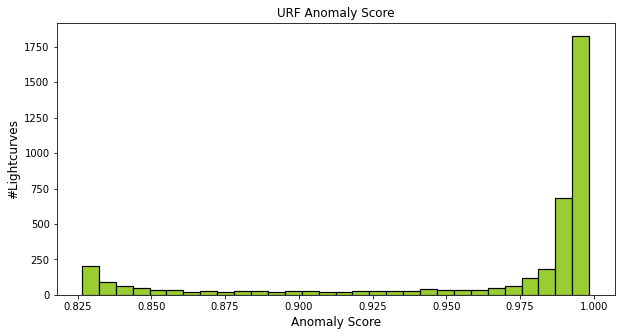

In [8]:
dis_matrix = URF.dissimilarity_matrix(plot=True)

In [9]:
anomaly_matrix=copy.deepcopy(dis_matrix)

In [10]:
n_outliers = 200
outlier_ids = np.arange(X_train.shape[0])
outlier_score = np.sort(anomaly_matrix)[::-1][:n_outliers]
outliers = outlier_ids[np.argsort(anomaly_matrix)][::-1][:n_outliers]

In [11]:
print(outlier_score[:10])

[0.9983972  0.99830841 0.99818284 0.99817183 0.99804205 0.99804179
 0.99802617 0.99801585 0.99797844 0.99797372]


In [12]:
print(outliers[:10])

[ 121 3167 2221 3568  773 2429  878  903 3640 2166]
